In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# import the important libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Diseased Dataset/train'
valid_path = '/content/drive/MyDrive/Cotton Diseased Dataset/test'

In [17]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [19]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Diseased Dataset/train/*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [22]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Diseased Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1954 images belonging to 4 classes.


In [26]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Cotton Diseased Dataset/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-27-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
62/62 [==============================] - 56s 814ms/step - loss: 2.1725 - accuracy: 0.7323 - val_loss: 0.2475 - val_accuracy: 0.9444
Epoch 2/20
62/62 [==============================] - 45s 725ms/step - loss: 0.6170 - accuracy: 0.8941 - val_loss: 0.6145 - val_accuracy: 0.7778
Epoch 3/20
62/62 [==============================] - 45s 728ms/step - loss: 0.6875 - accuracy: 0.8859 - val_loss: 1.1345 - val_accuracy: 0.7222
Epoch 4/20
62/62 [==============================] - 53s 853ms/step - loss: 0.5767 - accuracy: 0.9104 - val_loss: 0.4449 - val_accuracy: 0.8889
Epoch 5/20
62/62 [==============================] - 44s 717ms/step - loss: 0.4232 - accuracy: 0.9278 - val_loss: 4.7833e-04 - val_accuracy: 1.0000
Epoch 6/20
62/62 [==============================] - 45s 722ms/step - loss: 0.6413 - accuracy: 0.9145 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 7/20
62/62 [==============================] - 50s 817ms/step - loss: 0.4355 - accuracy: 0.9437 - val_loss: 6.4336e-05 - val_accuracy

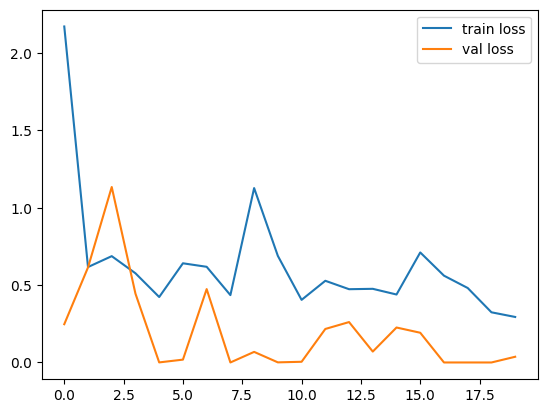

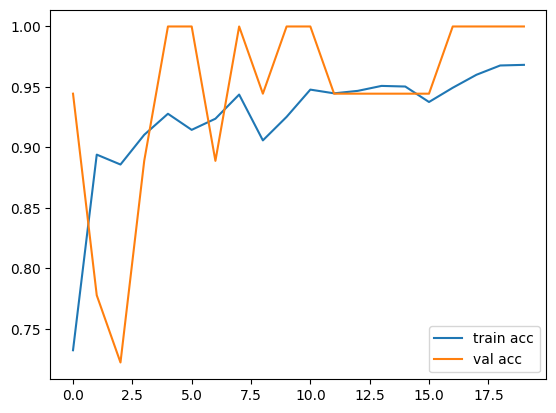

<Figure size 640x480 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

print("")

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
y_pred = model.predict(test_set)

1/1 [==============================] - 3s 3s/step


In [32]:
y_pred

array([[9.67322199e-34, 2.56255582e-31, 6.70218252e-34, 1.00000000e+00],
       [0.00000000e+00, 9.13072359e-19, 0.00000000e+00, 1.00000000e+00],
       [9.99966502e-01, 3.35183213e-05, 3.11084494e-26, 6.82262763e-27],
       [1.00000000e+00, 1.12432621e-22, 2.64439266e-25, 0.00000000e+00],
       [4.22736296e-29, 1.00000000e+00, 9.59525156e-23, 2.22756245e-21],
       [1.37253325e-11, 4.00074969e-16, 1.00000000e+00, 1.03001150e-18],
       [1.00000000e+00, 0.00000000e+00, 6.35795369e-34, 1.87552122e-31],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35298436e-34, 1.00000000e+00, 4.07272948e-35, 9.72241304e-36],
       [2.46025994e-01, 2.65590737e-19, 7.53974020e-01, 1.55860796e-19],
       [3.30513394e-11, 3.17925096e-01, 3.74833584e-12, 6.82074964e-01],
       [6.10671073e-13, 6.92766699e-13, 1.00000000e+00, 2.89253662e-15],
       [6.80393513e-14, 7.87627869e-07, 9.99999166e-01, 5.17310566e-31],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e

**Created by**: *Abdul Mannan*